# Neural Networks in PyTorch
## Chapter 3: Optimizers
Yen Lee Loh, 2021-9-1; 2022-9-22

Training a neural network involves optimizing the loss with respect to the network parameters.  Here we demonstrate the stochastic gradient descent (SGD) optimizer and the Adam optimizer.

In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import IPython.display
import time
if not torch.cuda.is_available(): print ("CUDA is not available!")

In [2]:
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (20,6)

---
## 1. Stochastic Gradient Descent
In this demo we use a simple neural network (linear layer followed by sigmoid layer) to perform logistic regression.  That is, we fit a data set using the model $y = \tanh (b + wx)$.  We use the SGD algorithm to minimize the loss function.  During training, we use the entire data set (xnd and ynd) as a batch.  Therefore we aren't really doing "stochastic" gradient descent; we are simply doing gradient descent.

Select the cell below.  Press Ctrl-Enter to start the animation.  Press I twice to stop the animation.

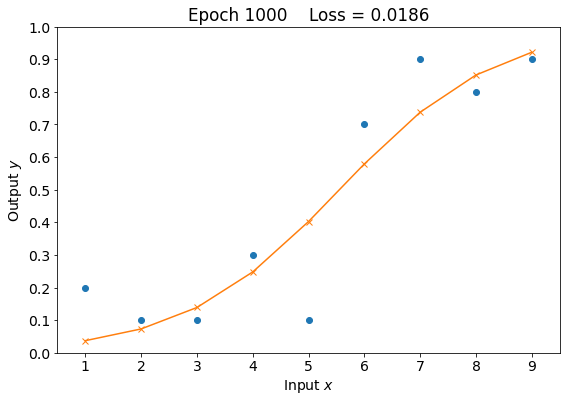

In [4]:
xnd = torch.tensor([[1,2,3,4,5,6,7,8,9]], dtype=torch.float32).T
ynd = torch.tensor([[2,1,1,3,1,7,9,8,9]], dtype=torch.float32).T * .1
model = nn.Sequential(nn.Linear(1,1),nn.Sigmoid())
lossFunc = nn.MSELoss()
learningRate = 0.5
plotInterval = 10
plt.rcParams["figure.figsize"] = (9,6)
try:
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(1,1001):
        Ynd = model(xnd)
        loss = lossFunc(Ynd,ynd)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % plotInterval == 0:
            plt.plot(xnd, ynd, 'o')
            plt.plot(xnd, Ynd.detach(), 'x-')
            plt.xlabel('Input $x$');  plt.xlim (.5, 9.5)
            plt.ylabel('Output $y$'); plt.ylim (0,1)
            plt.xticks (np.arange(1, 10, step=1.0))
            plt.yticks (np.arange(0, 1.001, step=0.1))
            plt.title ('Epoch {}    Loss = {:.4f}'.format(epoch, loss.item()))
            plt.show()
            IPython.display.clear_output(wait=True)  
            time.sleep(0.001)
except KeyboardInterrupt:
    pass  # press <Esc I I> to interrupt Jupyter notebook execution

---
## 2. Improved Demo
The demo below contains more panels.

Select the cell below.  Press Ctrl-Enter to start the animation.  Press I twice to stop the animation.

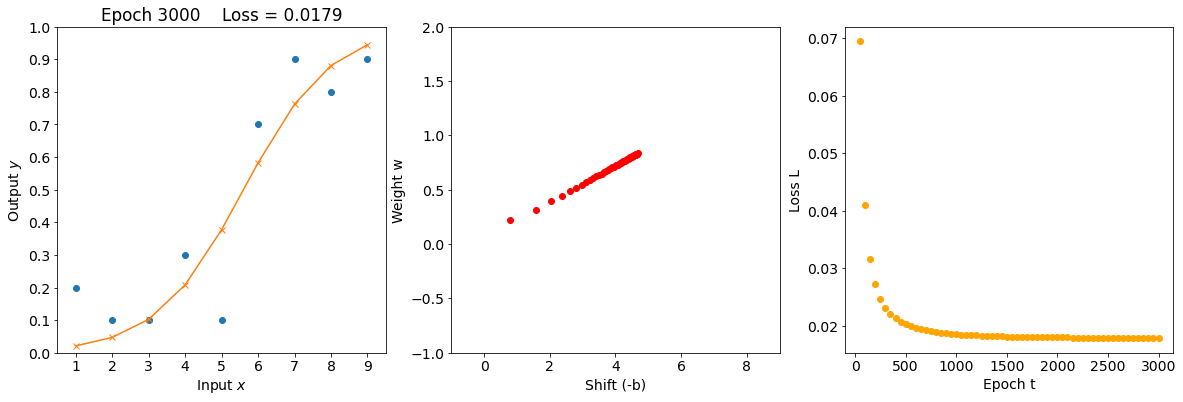

In [7]:
xnd = torch.tensor([[1,2,3,4,5,6,7,8,9]], dtype=torch.float32).T
ynd = torch.tensor([[2,1,1,3,1,7,9,8,9]], dtype=torch.float32).T * .1
model = nn.Sequential(nn.Linear(1,1),nn.Sigmoid())
lossFunc = nn.MSELoss()
learningRate = 0.5
epochsMax = 3000
epochsBetweenUpdates = 50

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=[20,6])
try:
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(1,epochsMax+1):
        Ynd = model(xnd)
        loss = lossFunc(Ynd,ynd)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % epochsBetweenUpdates == 0:
            ax1.clear ()
            ax1.plot (xnd, ynd, 'o')
            ax1.plot (xnd, Ynd.detach(), 'x-')
            ax1.set_xlabel('Input $x$');  ax1.set_xlim (.5, 9.5)
            ax1.set_ylabel('Output $y$'); ax1.set_ylim (0,1)
            ax1.set_xticks (np.arange(1, 10, step=1.0))
            ax1.set_yticks (np.arange(0, 1.001, step=0.1))
            ax1.set_title ('Epoch {}    Loss = {:.4f}'.format(epoch, loss.item()))
            #ax2.clear ()
            w = model[0].weight.item()
            b = model[0].bias.item()
            ax2.plot ([-b],[w],'ro')
            ax2.set_xlabel ('Shift (-b)');  ax2.set_xlim (-1,9)
            ax2.set_ylabel ('Weight w'); ax2.set_ylim (-1,2)
            ax3.plot ([epoch],[loss.detach()],'o',linestyle='solid',color='orange')
            ax3.set_xlabel ('Epoch t');
            ax3.set_ylabel ('Loss L');
            IPython.display.display(plt.gcf())
            #time.sleep(0.001)
            IPython.display.clear_output(wait=True)       
except KeyboardInterrupt:
    pass  # press <Esc I I> to interrupt Jupyter notebook execution

**Left:** Data $(x_n,y_n)$ and model $Y=\tanh(b+wx)$.  **Center:** Convergence in model parameter space (b,w).   **Right:** Loss as a function of epoch.

---
## 3. Adam
Select the cell below.  Press Ctrl-Enter to start the animation.  Press I twice to stop the animation.

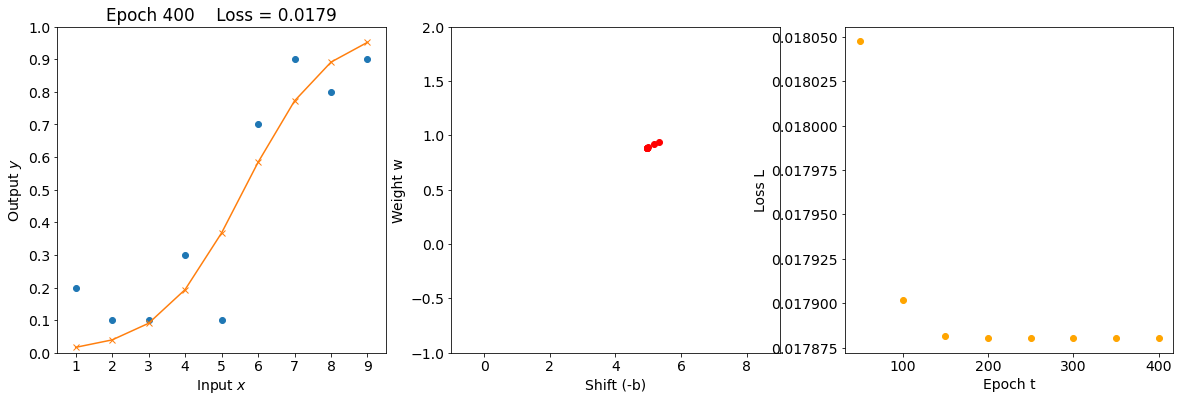

In [9]:
xnd = torch.tensor([[1,2,3,4,5,6,7,8,9]], dtype=torch.float32).T
ynd = torch.tensor([[2,1,1,3,1,7,9,8,9]], dtype=torch.float32).T * .1
model = nn.Sequential(nn.Linear(1,1),nn.Sigmoid())
lossFunc = nn.MSELoss()
learningRate = 0.5
epochsMax = 3000
epochsBetweenUpdates = 50

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=[20,6])
try:
    optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
    for epoch in range(1,epochsMax+1):
        Ynd = model(xnd)
        loss = lossFunc(Ynd,ynd)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % epochsBetweenUpdates == 0:
            ax1.clear ()
            ax1.plot (xnd, ynd, 'o')
            ax1.plot (xnd, Ynd.detach(), 'x-')
            ax1.set_xlabel('Input $x$');  ax1.set_xlim (.5, 9.5)
            ax1.set_ylabel('Output $y$'); ax1.set_ylim (0,1)
            ax1.set_xticks (np.arange(1, 10, step=1.0))
            ax1.set_yticks (np.arange(0, 1.001, step=0.1))
            ax1.set_title ('Epoch {}    Loss = {:.4f}'.format(epoch, loss.item()))
            #ax2.clear ()
            w = model[0].weight.item()
            b = model[0].bias.item()
            ax2.plot ([-b],[w],'ro')
            ax2.set_xlabel ('Shift (-b)');  ax2.set_xlim (-1,9)
            ax2.set_ylabel ('Weight w'); ax2.set_ylim (-1,2)
            ax3.plot ([epoch],[loss.detach()],'o',linestyle='solid',color='orange')
            ax3.set_xlabel ('Epoch t');
            ax3.set_ylabel ('Loss L');
            display.display(plt.gcf())
            #time.sleep(0.001)
            IPython.display.clear_output(wait=True)       
except KeyboardInterrupt:
    pass  # press <Esc I I> to interrupt Jupyter notebook execution

In the demo above, we use the same model and loss function as before.  But instead of the SGD (stochastic gradient descent) optimizer, we use the Adam optimizer.  Clearly, Adam is much more efficient.  The training is practically complete after about 200 epochs.

After about 1500 epochs, the Adam optimizer might start to do something REALLY strange; it seems to develop an instability!